In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('day.csv')

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

In [2]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.season.unique()

array([1, 2, 3, 4])

## Borrar variables

In [4]:
df = df.drop(columns=['casual','registered','instant','dteday','mnth','yr'])

In [5]:
target = 'cnt'
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Dummies

In [6]:
df.season.unique()

array([1, 2, 3, 4])

In [7]:
df.holiday.unique()

array([0, 1])

In [8]:
df.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [9]:
df.workingday.unique()

array([0, 1])

In [10]:
df.weathersit.unique()

array([2, 1, 3])

In [11]:
df = pd.get_dummies(df, columns=['season','weathersit','weekday'])

In [12]:
df.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [13]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,True,False,False,...,True,False,False,False,True,False,False,False,False,False
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,True,False,False,...,True,False,False,False,False,False,True,False,False,False


## Visualizar datos

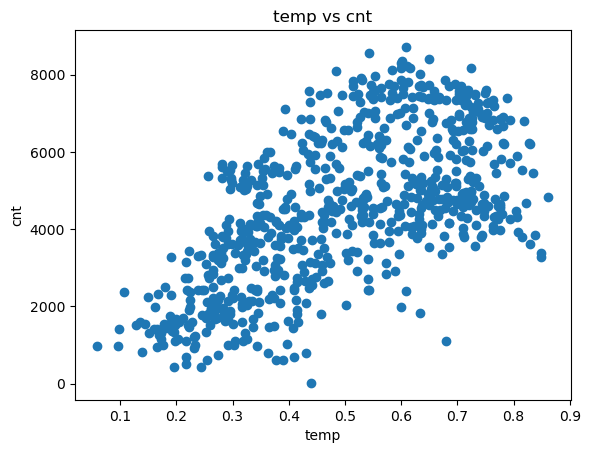

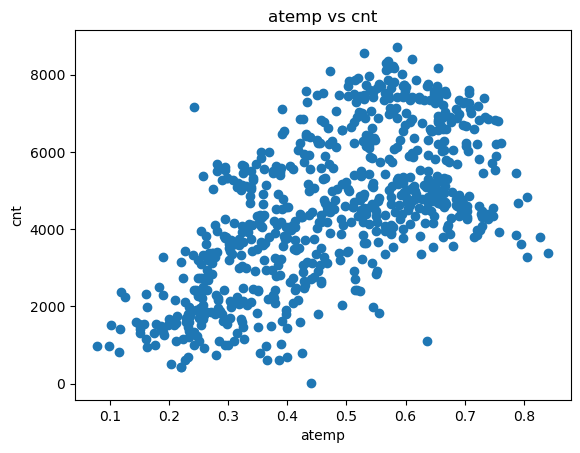

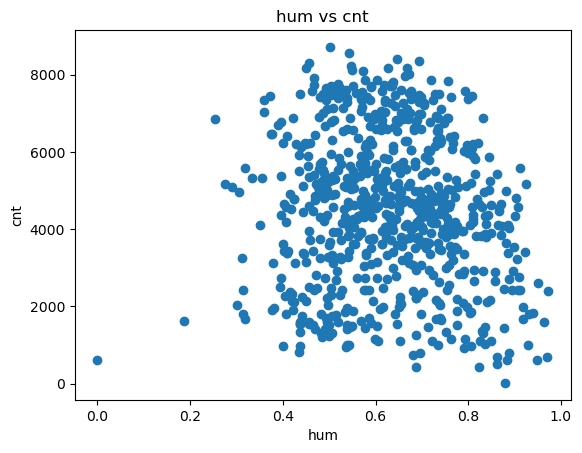

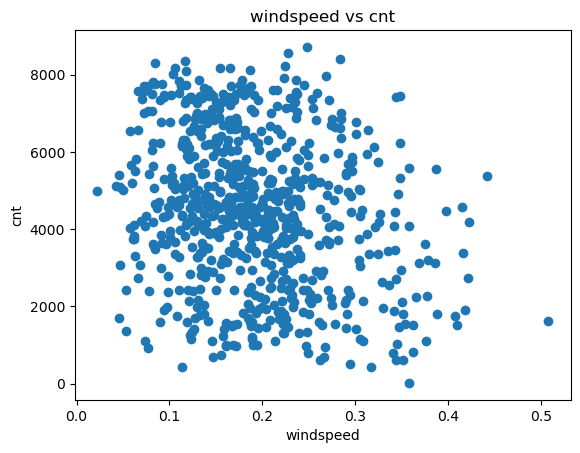

In [14]:
num_features = ['temp','atemp','hum','windspeed']

for i in num_features:
    plt.scatter(df[i],df['cnt'])
    plt.title(f'{i} vs cnt')
    plt.xlabel(i)
    plt.ylabel('cnt')
    plt.show()

Estas gráficas nos pueden ayudar a entender alguna relación entre las variables, en este caso tanto la variable **temp** y **atemp** parecen tener una relación postiva, a mayor incremento en $x$, mayor incremento en $y$, es decir, se rentan más bicicletas. En cuanto a las variables de hum y windspeed no se aprecia una relación tan clara, solo que la humedad suele ser alta y la velocidad del viento tiende a ser baja.

## Análisis bivariado

In [15]:
df_numerical = df[['temp','atemp','hum','windspeed','cnt']]
df_numerical = df_numerical.copy()

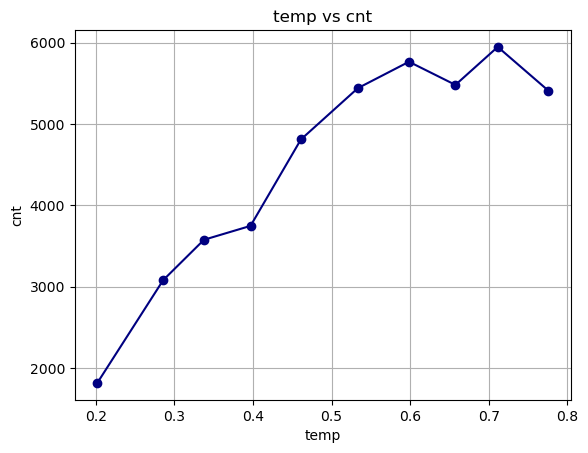

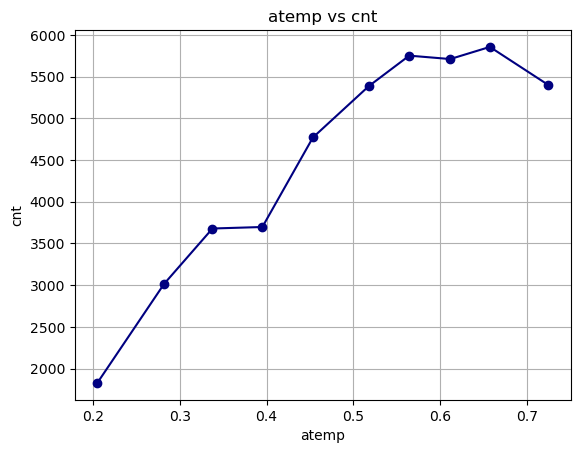

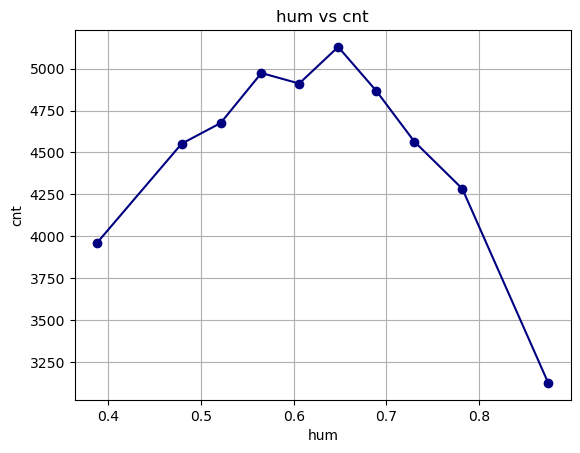

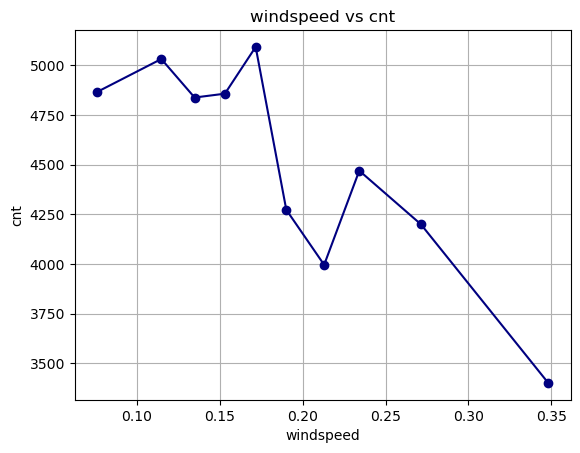

In [16]:
for feature in num_features:
    df_numerical[f'{feature}_bins'] = pd.qcut(df_numerical[feature], q=10, labels=False) + 1
    grouped = df_numerical.groupby(f'{feature}_bins').mean()
    plt.plot(grouped[feature], grouped['cnt'], marker='o', c='navy')
    plt.title(f'{feature} vs cnt')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.grid()
    plt.show()

Viendo la forma de las gráficas no se aprecia que haya una relación lineal entre las variables por si solas y el número de bicicletas, por otro lado debido al rango de las gráficas tanto **temp** como **atemp** podrían ser mejores variables predictoras, además hum tiene forma de parábola, por lo que podría tener una relación cuadrática con nuestra variable a predecir. Entonces haremos una regresión lineal múltiple para ver si jntando las variables se puede llegar a un buen modelo, y posteirormente se agregarán las variables dummies creadas para ver si hay mejora en el modelo.

## Prueba de modelos

### Regresión lineal múltiple (solo numéricas)

In [17]:
X_num = df[num_features]
y = df[target]

model = linear_model.LinearRegression().fit(X_num, y)
r2_num = r2_score(y_pred=model.predict(X_num), y_true=y)
print(f'r2: {r2_num}')

r2: 0.4638321133863571


El modelo creado con solo variables numéricas cuenta con un r2 de 0.46, lo cual es algo bajo, por lo tanto agregamos las dummies creadas para mejorar el modelo y ver como influyen estas variables.

### Regresión lineal múltiple (agregando variables categóricas)

In [18]:
X = df.drop(columns=['cnt'])
y = df[target]

model = linear_model.LinearRegression().fit(X, y)
r2 = r2_score(y_pred=model.predict(X), y_true=y)
print(f'r2: {r2}')

r2: 0.5626977112695537


Utilizando también las variables dummies el modelo mejore bastante logrando un r2 de 0.56 lo cual ya nos da un poder predictivo considerable.

In [19]:
model.intercept_

-9.154974891638214e+16

In [20]:
model.coef_

array([ 3.60209153e+16,  3.60209153e+16,  5.17130962e+03,  1.23076480e+03,
       -2.65952952e+03, -3.22742340e+03, -4.60877245e+16, -4.60877245e+16,
       -4.60877245e+16, -4.60877245e+16,  9.49552372e+16,  9.49552372e+16,
        9.49552372e+16,  4.26822362e+16,  6.66132092e+15,  6.66132092e+15,
        6.66132092e+15,  6.66132092e+15,  6.66132092e+15,  4.26822362e+16])

Viendo los resultados del modelo se puede observar que los coeficientes son números muy altos, por lo que vale la pena hacer utilizar la regularización Ridge para evitar tener coeficientes muy altos.

### Regularización Ridge

In [21]:
X_ridge = df.drop(columns=['cnt'])
y_ridge = df[target]
model = Ridge(alpha=0.1).fit(X_ridge, y_ridge)
r2_ridge = r2_score(y_pred=model.predict(X_ridge), y_true=y_ridge)
print(f'r2: {r2_ridge}')

r2: 0.5641267578337785


In [22]:
model.intercept_

2838.1610532904165

In [23]:
model.coef_

array([ -396.94247421,   223.32166278,  4667.7425152 ,  1601.820694  ,
       -2485.01310558, -3114.91654887,  -733.39111136,   197.8496453 ,
        -226.85909817,   762.40056424,   756.71931025,   495.71606321,
       -1252.43537346,  -121.00621565,  -148.05763056,   -69.33972255,
          16.50782576,    -6.97653304,    34.24524896,   294.62702708])

Usando la regularización Ridge, mantenemos el r2 en 0.56, siendo ligeramente superior, sin embargo, lo importante es que los coeficientes se mantuvieron en cantidades más interpretables sin afectar la capacidad predictiva del modelo.

## Modelo final

Dada la forma de parábola de la variable de **hum** contra el número de bicicletas vale la pena explorar esta idea para el modelo.

In [24]:
df['hum^2'] = df['hum']**2
X_ridge = df.drop(columns=['cnt'])
y_ridge = df[target]
model = Ridge(alpha=0.1).fit(X_ridge, y_ridge)
r2_ridge = r2_score(y_pred=model.predict(X_ridge), y_true=y_ridge)
mse_ridge = mean_squared_error(y_pred=model.predict(X_ridge), y_true=y_ridge)

print(f'r2: {r2_ridge}')

r2: 0.5704017635533617


In [25]:
model.intercept_

1409.507374356367

In [26]:
model.coef_

array([ -421.52089003,   225.67360548,  4799.82302119,  1446.76583634,
        3079.59768014, -3058.68037328,  -727.50093002,   214.07885028,
        -243.10310222,   756.52518196,   592.70186001,   405.14475429,
        -997.8466143 ,  -107.49414648,  -144.50678983,   -68.66885835,
           6.55983884,    -6.18800116,    16.95652595,   303.34143103,
       -4684.14778808])

Agregando la variable de $hum^2$, se logro un r2 de 0.5704, siendo mejor que el anterior de 0.56 y dejandolo como el modelo final.

In [27]:
print(f'R^2 del modelo: {r2_ridge:.4f}')
print(f'MSE del modelo: {mse_ridge:.4f}')
print()

print(f'Intercepto: {model.intercept_}')
print('Coeficientes:')
coeficientes = pd.DataFrame({
    'variable': X_ridge.columns, 
    'coeficiente': model.coef_})
coeficientes

R^2 del modelo: 0.5704
MSE del modelo: 1609985.7361

Intercepto: 1409.507374356367
Coeficientes:


,variable,coeficiente
0,holiday,-421.520890
1,workingday,225.673605
2,temp,4799.823021
3,atemp,1446.765836
4,hum,3079.597680
5,windspeed,-3058.680373
6,season_1,-727.500930
7,season_2,214.078850
8,season_3,-243.103102
9,season_4,756.525182


In [28]:
df['prediccciones'] = model.predict(X_ridge)

calibracion = pd.DataFrame({
    'predicciones': df['prediccciones'], 
    'real': df['cnt']})

calibracion['bins'] = pd.qcut(calibracion['predicciones'], q=10, labels=False) + 1
grouped_calibracion = calibracion.groupby('bins').mean()
grouped_calibracion['error'] = (grouped_calibracion.predicciones - grouped_calibracion.real) / grouped_calibracion.predicciones

grouped_calibracion

,predicciones,real,error
bins,,,
1,1773.370571,1541.500000,0.130751
2,2670.366325,2578.054795,0.034569
3,3418.442647,3316.397260,0.029851
4,4168.947587,4173.698630,-0.001140
5,4619.080462,4674.561644,-0.012011
6,4980.204443,5254.465753,-0.055070
7,5310.988190,5462.416667,-0.028512
8,5634.160890,6040.945946,-0.072200
9,5977.587235,6259.027397,-0.047083


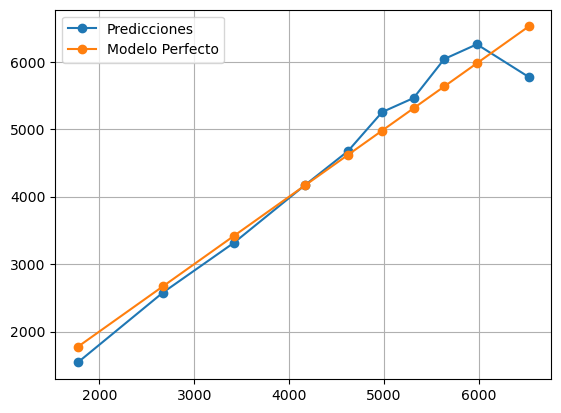

In [29]:
plt.plot(grouped_calibracion.predicciones, grouped_calibracion.real, 'o-', label='Predicciones')

plt.plot(grouped_calibracion.predicciones, grouped_calibracion.predicciones, 'o-', label='Modelo Perfecto')
plt.legend()
plt.grid();

Por último con esta gráfica podemos ver que cuando la renta de bicicletas es baja nuestro modelo suele estimar menos de las reales, pero cuando la renta es alta suele predecir que se rentarán un poco más de lo real, además el el último bin que es cuando la renta de bicicletas es lo más alto esta bastante por debajo (11% debajo) del valor real.